# Difference between functions and methods:
> Functions are independent blocks of code, that are declared outside the class. <br>
> Methods are defined within classes and operate on instances (objects) of those classes.

# Learnt from freecodecamp youtube channel, title: Python OOP

# Example of self parameter

In [1]:
class Item:
    def calculate_total_price(self):
        pass
    
# creating instance of class
item1 = Item()
item1.calculate_total_price()

> in the above code, if we go ahead and call the method(calculate_total_price) from an instance(item1), then python passes the object(item1) itself as the 1st argument EVERYTIME. <br>

> That is why we are not allowed to create METHODS that will never receive parameters

# Other extra things...

# 1.

In [3]:
class Item:
    def __init__(self):
        print("I am Jaimin")

item1 = Item()  # for each instance we create, it will automatically call the dunder methods

# 1. dunder methods = (double underscore methods) also called as magic methods
# 2. __init__ method is a constructor so it does not return any value

I am Jaimin


# 2.

In [18]:
class Item:
    def __init__(self, name: str, price : int, quantity: int):
        self.name = name
        self.price = price
        self.quantity = quantity
        print(self.name, self.price, self.quantity)

item1 = Item("Jaimin", "Jariwala", "Hello")

Jaimin Jariwala Hello


> as we can see above, even though we've mentioned type hints to the arguments passed while initializng the __init__ method, on passsing string value as a parameter during instantiation of a class and running it, is NOT THROWING AN ERROR! <br>

> reason: Type hints in Python are primarily used for static type checking and code clarity. They don't prevent you from passing values of different types to functions or methods.

# 3.

In [2]:
class Item:
    def __init__(self, name, price, quantity=0):
        self.name = name
        self.price = price
        self.quantity = quantity
        
    def calculate_total_price(self):
        
        # as the object itself is passed as an argument,
        # no need to again paas arguments to this function as well!
        
        return self.price * self.quantity 
    
item1 = Item("Jaimin", 100)
item2 = Item("Jariwala", 200, 10)

print(item1.calculate_total_price())
print(item2.calculate_total_price())

0
2000


# 4. Validating received arguments

In [12]:
class Item:
    def __init__(self, name: str, price: float, quantity=0):
        # run validations to the received arguments
        assert price >= 0
        
        # we can also write our own exception messages
        assert quantity >= 0, f"Quantity: '{quantity}' must be >= 0!"
        
        # assigning attributes to the self object
        self.name = name
        self.price = price
        self.quantity = quantity
        
    def calculate_total_price(self):
        return self.price * self.quantity
    
item1 = Item("Phone", 100, -1)
item2 = Item("Laptop", 1000, 3)

print(item1.calculate_total_price())
print(item2.calculate_total_price())

# hence this is how we can do validations for receieved arguments value!

AssertionError: Quantity: '-1' must be >= 0!

# 5. Class Attribute
> Class attributes are the variables that belong to the class itself, rather than individual instances of the class!

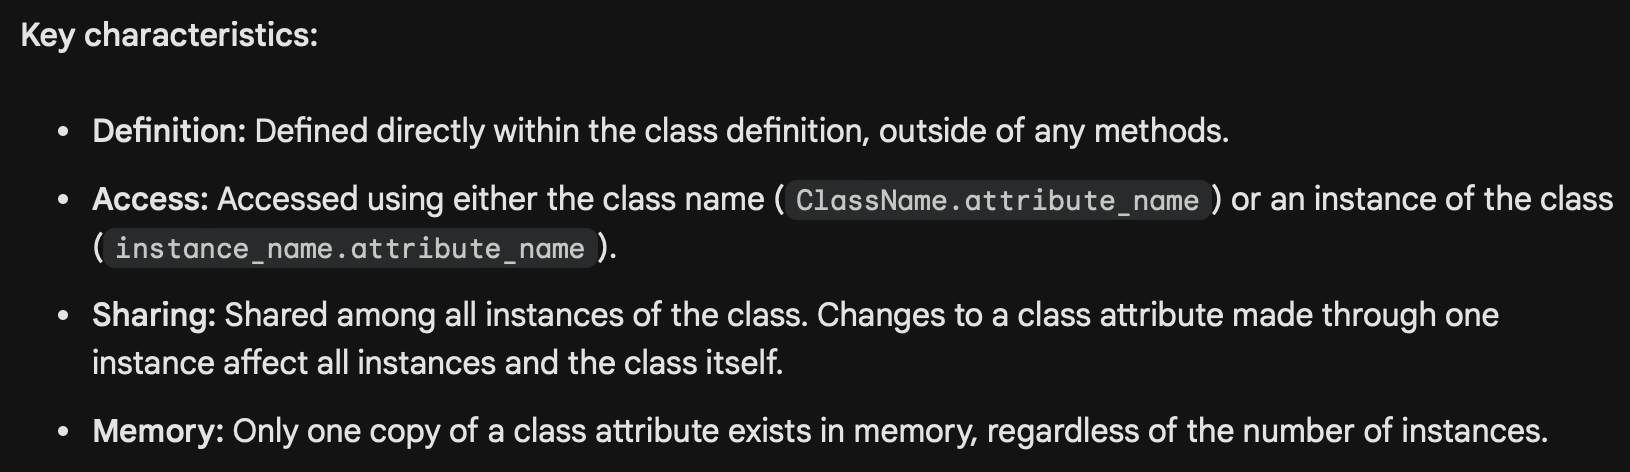

In [13]:
class Item:
    pay_rate = 0.8 # the pay rate after 20% discount
    
    def __init__(self, price: float, quantity: int):
        self.price = price
        self.quantity = quantity
        
    def apply_discount(self):
        self.price = self.price * Item.pay_rate
        """
        we can't just simply write pay_rate, 
        because that variable is only accesible through class or instance level
        """

# accessing using the class name: class_name.attribute_name
print("Accessing using class name:", Item.pay_rate)

# accessing using the instance name: instance_name.attribute_name
item1 = Item(20, 2)
print("Accessing using instance name:", item1.pay_rate)

# Modifying class attribute affects all instances
Item.pay_rate = "Jaimin"
print("\nModified class attribute:", Item.pay_rate)

print("\nAttributes at class level:\n", Item.__dict__)   # gives all the attributes for class level
print("\nAttributes at an instance level:\n", item1.__dict__)  # gives all the attributes for instance level

# this magic attribute __dict__ is responsible to take all the attributes and converts it to a dictionary

Accessing using class name: 0.8
Accessing using instance name: 0.8

Modified class attribute: Jaimin

Attributes at class level:
 {'__module__': '__main__', 'pay_rate': 'Jaimin', '__init__': <function Item.__init__ at 0x7c1052c9ecb0>, 'apply_discount': <function Item.apply_discount at 0x7c1052c9ee60>, '__dict__': <attribute '__dict__' of 'Item' objects>, '__weakref__': <attribute '__weakref__' of 'Item' objects>, '__doc__': None}

Attributes at an instance level:
 {'price': 20, 'quantity': 2}


# 6. About: \_ \_repr \_ \_ (dunder method)

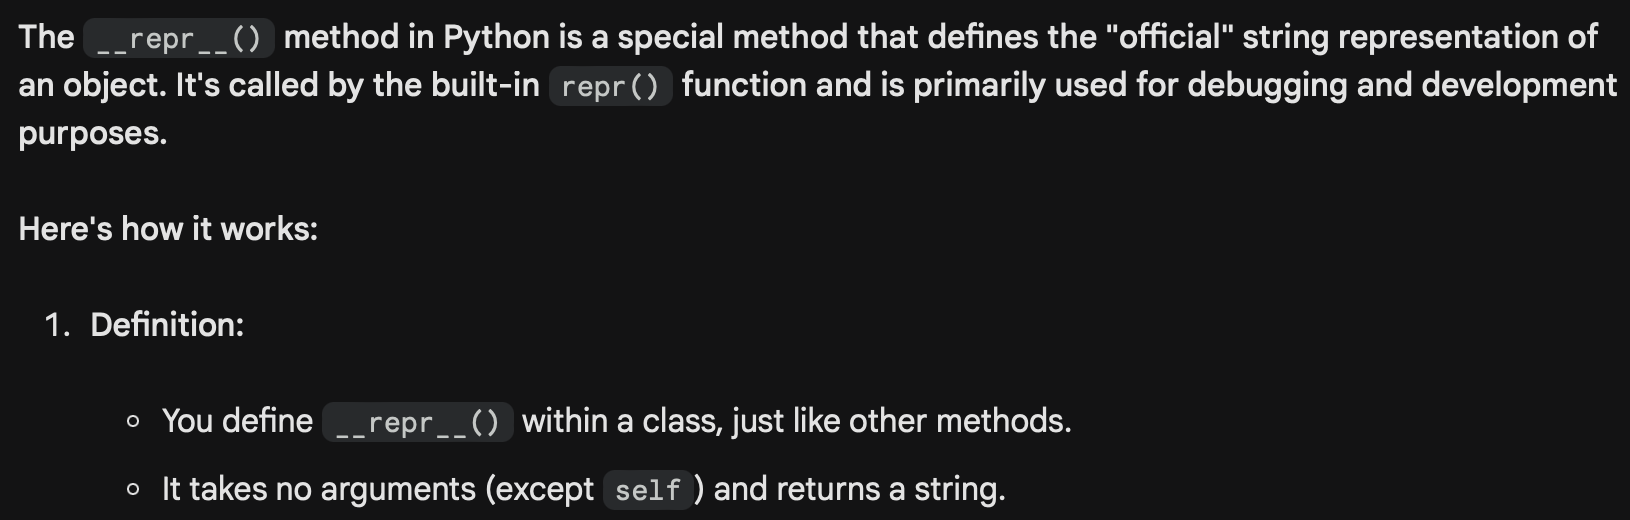

In [25]:
class Item:
    all = []
    def __init__(self, name: str, price: float, quantity: int):
        self.name = name
        self.price = price
        self.quantity = quantity
        
        # actions to execute
        Item.all.append(self)
        
    def __repr__(self): # note: __repr__ method CAN RETURN, but __init__ method can't, it's a constructor!
        return f"\nItem('{self.name}', {self.price}, {self.quantity})\n"
        
item1 = Item("Phone", 10, 1)
item2 = Item("Laptop", 100, 2)
item3 = Item("Cable", 500, 3)
item4 = Item("Mouse", 1000, 4)
item5 = Item("Keyboard", 2000, 5)

print(Item.all)

[
Item('Phone', 10, 1)
, 
Item('Laptop', 100, 2)
, 
Item('Cable', 500, 3)
, 
Item('Mouse', 1000, 4)
, 
Item('Keyboard', 2000, 5)
]
